In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
from data_loader import TLCDataLoader

# Data Source 1: FHVHV Trip Data 2024

In [5]:
# Initialize loader
loader = TLCDataLoader("../data/raw")

TLCDataLoader initialized with 12 monthly files.


In [6]:
# List available features
loader.list_features()


Available Columns (24 total):
 - hvfhs_license_num
 - dispatching_base_num
 - originating_base_num
 - request_datetime
 - on_scene_datetime
 - pickup_datetime
 - dropoff_datetime
 - PULocationID
 - DOLocationID
 - trip_miles
 - trip_time
 - base_passenger_fare
 - tolls
 - bcf
 - sales_tax
 - congestion_surcharge
 - airport_fee
 - tips
 - driver_pay
 - shared_request_flag
 - shared_match_flag
 - access_a_ride_flag
 - wav_request_flag
 - wav_match_flag


In [11]:
# Test: Batch loading (multiple months)
df_batch = loader.load_in_batches(
features=["PULocationID", "DOLocationID", "pickup_datetime", "trip_miles", "trip_time", "base_passenger_fare", "tolls", "bcf", "sales_tax", "congestion_surcharge", "airport_fee", "tips"],
    months=["2024-01","2024-02","2024-03","2024-04","2024-05","2024-06","2024-07","2024-08","2024-09","2024-10","2024-11","2024-12"],
    batch_size=3,
    sample_ratio=0.2
)

print(f"Batch loaded: {df_batch.shape}")
# print(f"\nSummary statistics:")
# print(df_batch.describe())



Processing batch 1/4: ['2024-01', '2024-02', '2024-03']
Selected 3 files: ['fhvhv_tripdata_2024-01.parquet', 'fhvhv_tripdata_2024-02.parquet', 'fhvhv_tripdata_2024-03.parquet']
Loading columns: ['PULocationID', 'DOLocationID', 'pickup_datetime', 'trip_miles', 'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax', 'congestion_surcharge', 'airport_fee', 'tips']
Ready columns: ['PULocationID', 'DOLocationID', 'pickup_datetime', 'trip_miles', 'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax', 'congestion_surcharge', 'airport_fee', 'tips']
Batch 1 completed: 12,058,443 rows

Processing batch 2/4: ['2024-04', '2024-05', '2024-06']
Selected 3 files: ['fhvhv_tripdata_2024-04.parquet', 'fhvhv_tripdata_2024-05.parquet', 'fhvhv_tripdata_2024-06.parquet']
Loading columns: ['PULocationID', 'DOLocationID', 'pickup_datetime', 'trip_miles', 'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax', 'congestion_surcharge', 'airport_fee', 'tips']
Ready columns: ['PULocatio

In [12]:
df_batch.head()

PULocationID,DOLocationID,pickup_datetime,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips
i32,i32,datetime[μs],f64,i64,f64,f64,f64,f64,f64,f64,f64
188,39,2024-01-01 00:00:59,3.327,1024,17.01,0.0,0.47,1.51,0.0,0.0,10.0
76,77,2024-01-01 00:53:41,1.215,626,18.8,0.0,0.52,1.67,0.0,0.0,0.0
90,249,2024-01-01 00:33:55,1.43,1115,9.14,0.0,0.25,0.81,2.75,0.0,0.0
157,82,2024-01-01 00:06:26,3.1,1027,17.85,0.0,0.49,1.58,0.0,0.0,0.0
56,75,2024-01-01 00:42:58,9.36,1392,27.04,6.94,0.93,3.02,0.0,0.0,0.0


In [ ]:
# Transform to Pandas for analysis
df_batch = df_batch.to_pandas()

In [15]:
# Show completeness of columns
completeness = df_batch.notnull().mean().sort_values(ascending=False)
completeness

PULocationID            1.0
DOLocationID            1.0
pickup_datetime         1.0
trip_miles              1.0
trip_time               1.0
base_passenger_fare     1.0
tolls                   1.0
bcf                     1.0
sales_tax               1.0
congestion_surcharge    1.0
airport_fee             1.0
tips                    1.0
dtype: float64

In [17]:
# Show duplicates
duplicates = df_batch.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Exclude duplicates for further analysis
df_batch = df_batch.drop_duplicates()

Number of duplicate rows: 4


In [18]:
# Outlier analysis: Exclude 1% and 99% percentiles
for col in ['trip_miles', 'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax', 'congestion_surcharge', 'airport_fee', 'tips']:
    lower_bound = df_batch[col].quantile(0.01)
    upper_bound = df_batch[col].quantile(0.99)
    df_batch = df_batch[(df_batch[col] >= lower_bound) & (df_batch[col] <= upper_bound)]

In [20]:
df_batch.shape

(42599749, 12)

In [21]:
# Output cleaned data 
df_batch.to_csv("../data/processed/dataset.csv", index=False)

# Data Source 2: Taxi Zone

In [7]:
# Load taxi zone shapefile
taxi_zones = gpd.read_file("../data/taxi_zones/taxi_zones.shp")
taxi_zones.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')

In [8]:
taxi_zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


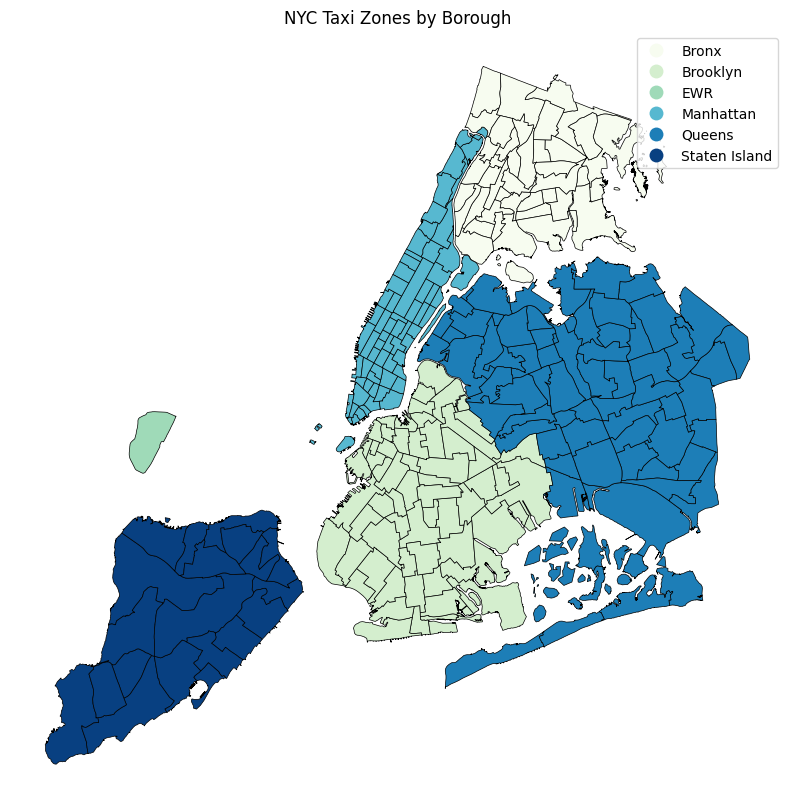

In [10]:
taxi_zones.plot(column='borough', legend=True, figsize=(10, 10), cmap='GnBu', edgecolor='black', linewidth=0.5)
plt.title("NYC Taxi Zones by Borough")
plt.axis('off')
plt.show()